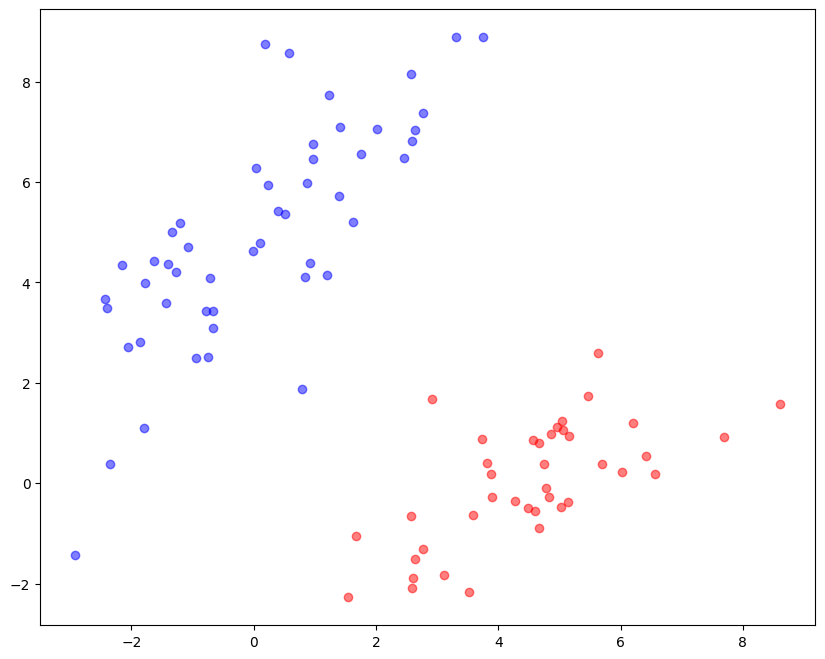

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
# list of points
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
np.random.seed(22)

means = [[0, 5], [5, 0]] 
cov0 = [[4, 3], [3, 4]]
cov1 = [[3, 1], [1, 1]]
N0 = 50
N1 = 40
N = N0 + N1
X0 = np.random.multivariate_normal(means[0], cov0, N0) # each row is a data point
X1 = np.random.multivariate_normal(means[1], cov1, N1)

plt.figure(figsize=(10,8))

# Biểu diễn X0
plt.scatter(X0[:, 0], X0[:, 1], color='b', alpha=0.5, label='N1')

# Biểu diễn X1
plt.scatter(X1[:, 0], X1[:, 1], color='r', alpha=0.5, label='N2')
plt.show()

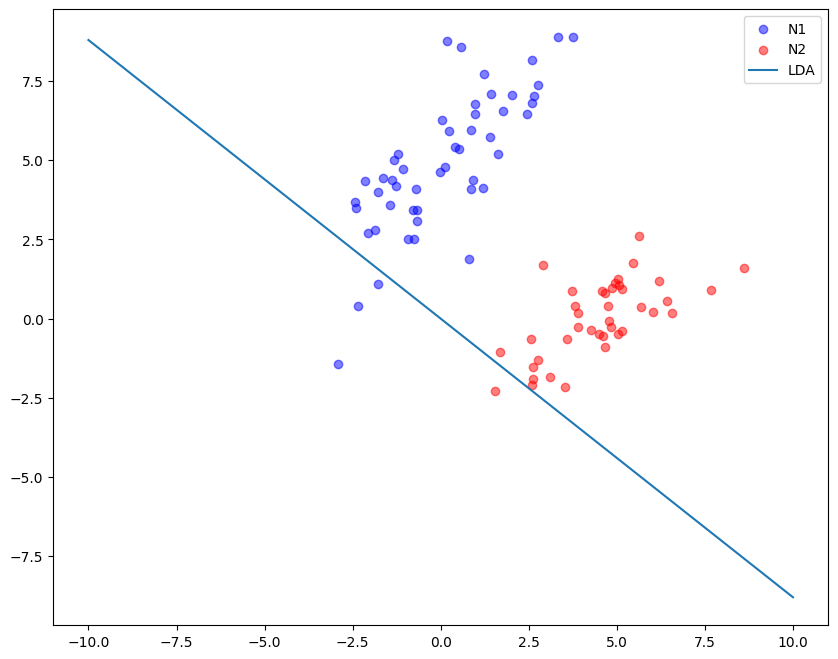

In [5]:
# Build S_B
m0 = np.mean(X0.T, axis = 1, keepdims = True) #tính giá trị trung vị
m1 = np.mean(X1.T, axis = 1, keepdims = True)

a = (m0 - m1)
S_B = a.dot(a.T) #tính tích vô hướng  - a.T là chuyển vị 

# Build S_W
A = X0.T - np.tile(m0, (1, N0)) # Lặp lại mảng m0 với số lần là (1,N0)
B = X1.T - np.tile(m1, (1, N1))

S_W = A.dot(A.T) + B.dot(B.T)

_, W = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
w = W[:,0]
plt.figure(figsize=(10,8))

# Biểu diễn X0
plt.scatter(X0[:, 0], X0[:, 1], color='b', alpha=0.5, label='N1')

# Biểu diễn X1
plt.scatter(X1[:, 0], X1[:, 1], color='r', alpha=0.5, label='N2')
x = np.linspace(-10, 10, 100)
# Tính toán các giá trị tương ứng cho trục y
y = w[1]/w[0] * x

# Vẽ đường thẳng
plt.plot(x, y, label='LDA')
plt.legend()
plt.show()